In [3]:
from PIL import Image,ImageEnhance,ImageOps,ImageFilter
import pandas as pd
import re
%pylab inline
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
import cv2


Populating the interactive namespace from numpy and matplotlib


In [92]:
text_data=pd.read_csv('/home/samuel/Documents/Data/OC/Projet6/Dataset+projet+prétraitement+textes+images/Flipkart/flipkart_com-ecommerce_sample_1050.csv')

In [93]:
text_data.head(1)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."


In [94]:
def find(x):
    c=re.findall(r'\["([A-Za-z &]*) >> ',x)
    return c[0]
find('["Home Furnishing >> Curtains & Accessories >>')

'Home Furnishing'

In [95]:
data=text_data[['uniq_id','image','product_category_tree']].copy()
data['categorie']=data['product_category_tree'].apply(lambda x:find(x))
data.drop('product_category_tree',axis=1,inplace=True)

In [96]:
data.describe()

,uniq_id,image,categorie
count,1050,1050,1050
unique,1050,1050,7
top,f309bdd259c5b46a560bc1620e641947,d218c32df572e82db50faecd62179db2.jpg,Beauty and Personal Care
freq,1,1,150


In [97]:
data.head()

,uniq_id,image,categorie
0,55b85ea15a1536d46b7190ad6fff8ce7,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing


In [98]:
def reduc(x):
    img=Image.open(x)
    img.thumbnail((224,224))
    return img
#On charge les images en noir et blanc et au format 224x224:
data['image']=data['image'].apply(lambda x: np.array(reduc(x).convert('L')))

/home/samuel/anaconda3/lib/python3.8/site-packages/PIL/Image.py:2834: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [99]:
data.head(1)

,uniq_id,image,categorie
0,55b85ea15a1536d46b7190ad6fff8ce7,"[[198, 198, 198, 198, 198, 200, 200, 199, 199,...",Home Furnishing


In [100]:
data.head(1)

,uniq_id,image,categorie
0,55b85ea15a1536d46b7190ad6fff8ce7,"[[198, 198, 198, 198, 198, 200, 200, 199, 199,...",Home Furnishing


# On traite les images

In [101]:
#On traite les images
def traitement(x):
    newImg1 = cv2.equalizeHist(x)#On normalise l'histogramme
    newImg2 = cv2.GaussianBlur(newImg1, (3, 3), 3)#On filtre
    return np.array(newImg2)
data['image_trait']=data['image'].apply(lambda x: traitement(x))

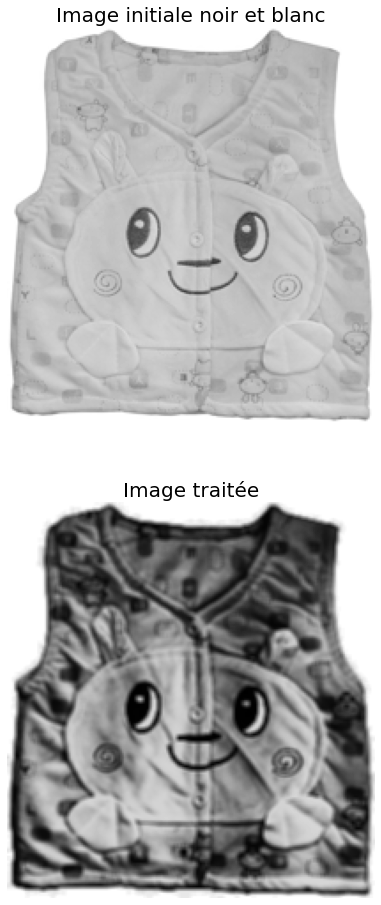

In [102]:
#regardons:
fig=plt.figure(figsize=(21,16))

plt.subplot(211)
plt.imshow(data.iloc[450]['image'],cmap='gray', vmin=0, vmax=255)
plt.title('Image initiale noir et blanc',size=20)
plt.axis('off')
plt.subplot(212)
plt.imshow(data.iloc[450]['image_trait'],cmap='gray', vmin=0, vmax=255)
plt.title('Image traitée',size=20)
plt.axis('off')

plt.show()

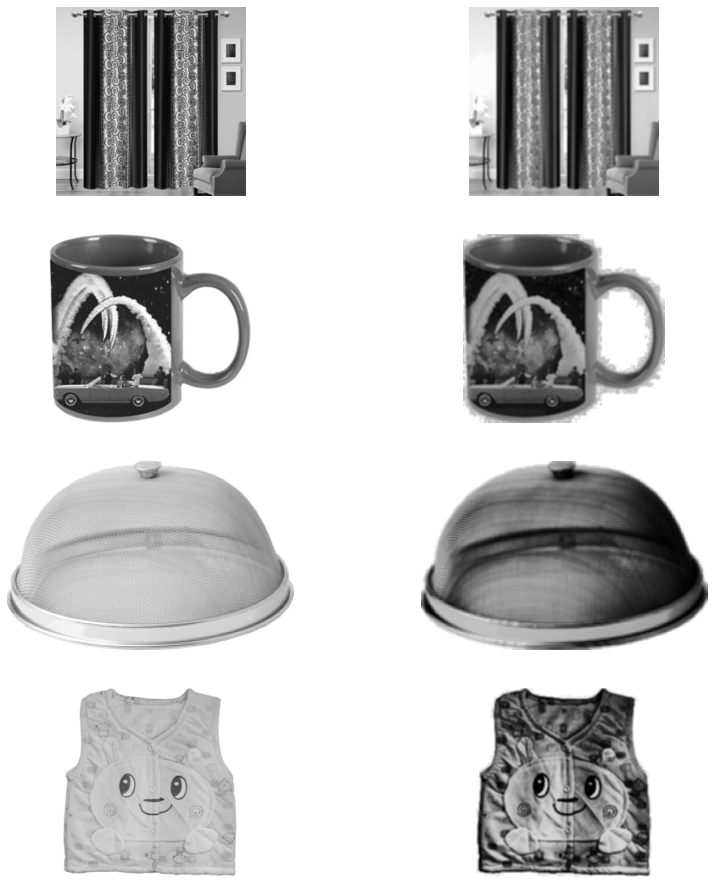

In [103]:
#regardons les autres images:
#regardons:
fig=plt.figure(figsize=(21,16))

for i in range(4):
    plt.subplot(4,3,3*i+1)
    plt.imshow(data.iloc[150*i]['image'],cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    
    plt.subplot(4,3,3*i+2)
    plt.imshow(data.iloc[150*i]['image_trait'],cmap='gray', vmin=0, vmax=255)
    plt.axis('off')


In [74]:
#On va voir ce que ca nous donne avec ça...

In [104]:
test=data.iloc[450]['image_trait']

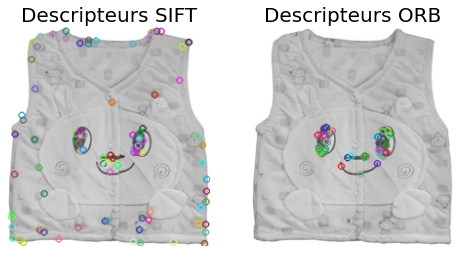

In [105]:
sf =data.iloc[450]['image']
img=data.iloc[450]['image_trait']

sift=cv2.SIFT_create(100)
kps, descs = sift.detectAndCompute(sf, None)

orb = cv2.ORB_create(100)
kp, des = orb.detectAndCompute(sf,None)

img2 = cv2.drawKeypoints(sf, kps, outImage=None) 
img3 = cv2.drawKeypoints(sf,kp,outImage=None)

fig=plt.figure(figsize=(8,16))
plt.subplot(121)
plt.imshow(img2)
plt.axis('off')
plt.title('Descripteurs SIFT',size=20)
plt.subplot(122)
plt.imshow(img3)
plt.title('Descripteurs ORB',size=20)
plt.axis('off')
plt.show()


In [106]:
descs.shape

(100, 128)

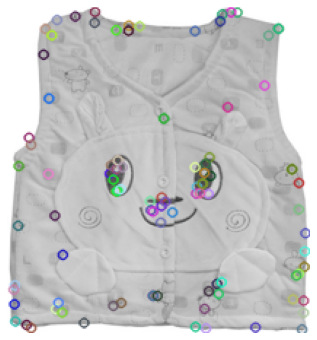

In [107]:
img2 = cv2.drawKeypoints(sf, kps[:100], outImage=None) 
plt.figure(figsize = (6,6))
plt.imshow(img2)
plt.axis('off')
plt.show()

In [108]:
def extracteur_desc_Sift(image):
    sift=cv2.SIFT_create()
    (kps, desc) = sift.detectAndCompute(image, None)
    return desc

In [109]:
#On va mettre nos descripterus dans le tableu
data["SIFTtrait"]=data["image_trait"].apply(extracteur_desc_Sift)

In [110]:
data["SIFTtrait"].apply(lambda x:size(x)).describe()

count      1050.000000
mean      36045.409524
std       28321.181280
min         640.000000
25%       16896.000000
50%       28096.000000
75%       46592.000000
max      267904.000000
Name: SIFTtrait, dtype: float64

In [111]:
#On crée un tableau de descripteurs:
descr=data.loc[0,"SIFTtrait"]
for i in range(1,data.shape[0]):
    if size(data.loc[i,"SIFTtrait"])>1:
        descr=np.vstack([descr,data.loc[i,"SIFTtrait"]])

In [112]:
descr.shape

(295685, 128)

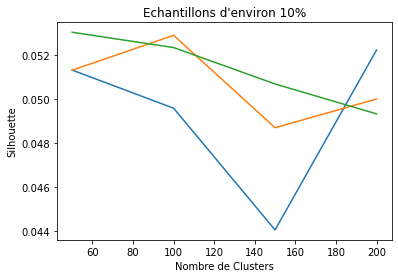

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#on va voir comment clusteriser ces descripteurs:
for i in range(3):
    #Je prends un échantillon de 10% du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,10000)
    sil=[]
    for i in range(50,250,50):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(50,250,50),sil)
    
plt.title("Echantillons d'environ 10%")
plt.xlabel('Nombre de Clusters')
plt.ylabel('Silhouette')

plt.show()  
    

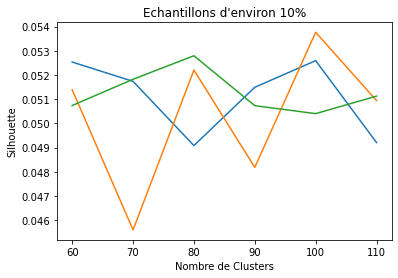

In [60]:
for i in range(3):
    #Je prends un échantillon du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,10000)
    sil=[]
    for i in range(60,120,10):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(60,120,10),sil)

plt.title("Echantillons d'environ 10%")
plt.xlabel('Nombre de Clusters')
plt.ylabel('Silhouette')

plt.show()  

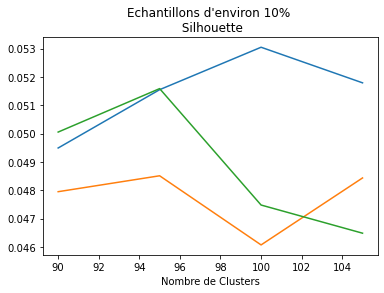

In [61]:
#On essai entre 50 et 100
for i in range(3):
    #Je prends un échantillon du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,10000)
    sil=[]
    for i in range(90,110,5):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(90,110,5),sil)
plt.title("Echantillons d'environ 10% \n Silhouette")
plt.xlabel('Nombre de Clusters')
plt.show()  

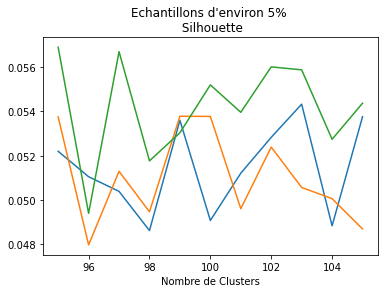

In [62]:
#On essai entre 50 et 100
for i in range(3):
    #Je prends un échantillon du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,5000)
    sil=[]
    for i in range(95,106,1):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(95,106,1),sil)
plt.title("Echantillons d'environ 5% \n Silhouette")
plt.xlabel('Nombre de Clusters')
plt.show() 

In [113]:
#On va partir sur 102 clusters
#regardons ce que ça donne:
km=KMeans(n_clusters=102)
km.fit(descr)
y=km.predict(descr)

In [114]:
#On a donc notre cluster
#on va construire un df avec 102 features et pour chaque image on indiquera combien de descripteurs de chaque
#cluster elle contient:

df2=data[['categorie',"SIFTtrait"]].copy()
df2.head()


,categorie,SIFTtrait
0,Home Furnishing,"[[7.0, 134.0, 134.0, 11.0, 0.0, 0.0, 0.0, 5.0,..."
1,Baby Care,"[[12.0, 31.0, 4.0, 2.0, 6.0, 27.0, 3.0, 2.0, 9..."
2,Baby Care,"[[7.0, 0.0, 0.0, 0.0, 0.0, 32.0, 144.0, 26.0, ..."
3,Home Furnishing,"[[51.0, 115.0, 54.0, 5.0, 0.0, 1.0, 2.0, 4.0, ..."
4,Home Furnishing,"[[0.0, 0.0, 0.0, 149.0, 46.0, 0.0, 0.0, 0.0, 1..."


In [115]:
km.predict(df2.iloc[0]['SIFTtrait'])

array([  3,  83,  99,  56,  31,  17,  61,  52,  52,  92,  61,   9,  69,
        61,  42,  65,  26,  16,  76,  97,  33,  33, 100, 100,  36,  36,
        97,  36,  59,  74,  13,  23,  91,   0,  52,   9,  65,  46,  44,
         9,  79, 101,  98,  68,  68,  91,  16,  16,  93,  22,   3,  47,
        21,  27,  55,  16,  94,  97,  83,  55,   3,  50,  74,  11,  47,
        15,  47,  15,  15,  47,  15,  15,  15,  77, 101,  15,  15,  15,
        15,  15,  15,  93,  35,  35,  35,  35,  35,  35,  42,  29,  15,
        35,  15,  29,  15,  35,  15,  35,  80,  45,  34,  70,  84,   7,
        84,  41,  54,  88,  23,  54,  41,  84,  54,  54,  54,  54,  54,
        79,  36,  35,  82,  82,  37,  82,   5,  82,  82,   5,  82,  82,
        62,  98,   9,  49,  46,  49,  78,  98,  58,  85,  70,  68,  85,
        58,  29,  84,  80,  29,  68,  51,  29,  70,  68,  70,  29,   1,
        70,  29,  29,  70,   2,  85,  70,  29,  70,  96,  68,  80,  29,
         0,  39,  35,  98,  84,   0,  68,  34,  84,  41,  39,  7

In [116]:
def features(row,k):
    n=0
    for i in km.predict(row['SIFTtrait']):
        if i==k:
            n+=1
    return n

In [117]:
for i in range(102):
    df2[i]=df2.apply(lambda x: features(x,i),axis=1)

In [118]:
df2

,categorie,SIFTtrait,0,1,2,3,4,5,6,7,...,92,93,94,95,96,97,98,99,100,101
0,Home Furnishing,"[[7.0, 134.0, 134.0, 11.0, 0.0, 0.0, 0.0, 5.0,...",7,3,3,6,0,3,1,4,...,1,5,3,1,4,6,7,1,4,7
1,Baby Care,"[[12.0, 31.0, 4.0, 2.0, 6.0, 27.0, 3.0, 2.0, 9...",1,3,1,2,2,0,0,0,...,1,1,1,0,3,0,1,0,3,0
2,Baby Care,"[[7.0, 0.0, 0.0, 0.0, 0.0, 32.0, 144.0, 26.0, ...",1,12,4,2,1,0,0,1,...,5,0,1,3,0,1,6,0,2,6
3,Home Furnishing,"[[51.0, 115.0, 54.0, 5.0, 0.0, 1.0, 2.0, 4.0, ...",16,6,10,0,9,15,17,1,...,4,0,2,2,10,5,3,0,16,2
4,Home Furnishing,"[[0.0, 0.0, 0.0, 149.0, 46.0, 0.0, 0.0, 0.0, 1...",4,2,7,1,7,5,3,1,...,3,2,1,5,6,14,3,1,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,Baby Care,"[[30.0, 108.0, 85.0, 28.0, 3.0, 0.0, 0.0, 0.0,...",3,6,0,3,2,1,3,1,...,4,7,1,3,6,5,1,33,4,7
1046,Baby Care,"[[44.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.0, 49...",2,0,0,1,0,0,1,0,...,2,5,2,4,2,3,2,2,1,0
1047,Baby Care,"[[45.0, 2.0, 0.0, 17.0, 115.0, 2.0, 0.0, 1.0, ...",1,3,5,9,2,4,19,1,...,7,15,5,4,7,13,3,30,10,2
1048,Baby Care,"[[127.0, 47.0, 27.0, 14.0, 0.0, 0.0, 0.0, 0.0,...",1,0,1,0,0,1,1,0,...,0,1,1,2,0,0,2,0,2,0


In [174]:
X=df2.drop(['categorie','SIFTtrait'],axis=1).values

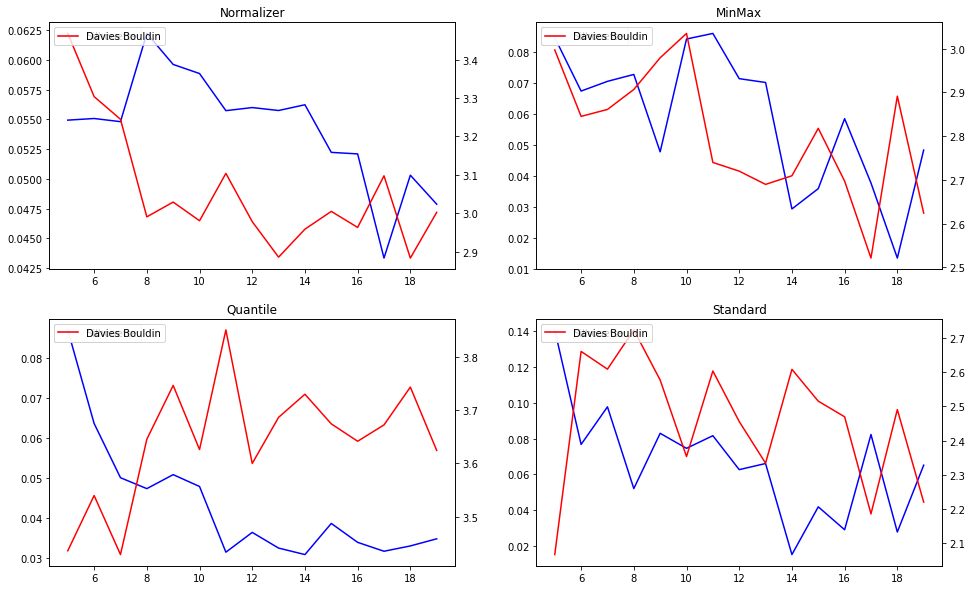

In [120]:
#On standardise et on regarde ce que ça donne:

from sklearn.preprocessing import Normalizer,MinMaxScaler,QuantileTransformer,StandardScaler
from sklearn.metrics import davies_bouldin_score

Trans=[Normalizer(),MinMaxScaler(),QuantileTransformer(),StandardScaler()]
Name=['Normalizer','MinMax','Quantile','Standard']
fig=figure(figsize=(16,10))
for i in range (4):
    sil=[]
    DB=[]
    X_trans=Trans[i].fit_transform(X)
    for n in range (5,20):
        kmean=KMeans(n_clusters=n)
        kmean.fit(X_trans)
        y=kmean.predict(X_trans)
        sil.append(silhouette_score(X_trans,y))
        DB.append(davies_bouldin_score(X_trans,y))
    plt.subplot(2,2,i+1)
    s=plt.plot(range(5,20),sil,c='b')
    plt.legend(s,['Silhouette'],loc='upper left')
    ax2 = pyplot.gca().twinx()
    d=plt.plot(range(5,20),DB,c='r')
    plt.legend(d,['Davies Bouldin'],loc='upper left')
    plt.title(Name[i])
plt.show()

In [122]:
def cat(x):
    if x=='Home Furnishing':
        return 1
    if x=='Kitchen & Dining':
        return 2
    if x=='Computers':
        return 3
    if x=='Beauty and Personal Care':
        return 4
    if x=='Watches':
        return 5
    if x=='Baby Care':
        return 6
    else:
        return 0

In [123]:
df2['cluster']=df2['categorie'].apply(lambda x : cat(x))

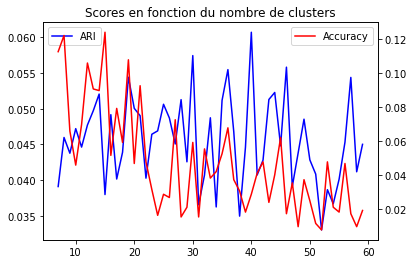

In [175]:
#On regarde ce que donnent les scores en fonction du nombre de cluster:
from sklearn.metrics import adjusted_rand_score,accuracy_score

X_std=StandardScaler().fit_transform(X)

ARI=[]
acc=[]

for n_cluster in range(7,60):
    kmean=KMeans(n_clusters=n_cluster)
    kmean.fit(X_std)
    y=kmean.predict(X_std)
    ARI.append(adjusted_rand_score(y,df2['cluster']))
    acc.append(accuracy_score(y,df2['cluster']))

rand=plt.plot(range(7,60),ARI,label="ARI",c='b')
plt.legend(rand,['ARI'],loc='upper left')
ax2 = pyplot.gca().twinx()
accuracy=plt.plot(range(7,60),acc,c='r')
plt.legend(accuracy,['Accuracy'],loc='upper right')
plt.title('Scores en fonction du nombre de clusters')
plt.show()


In [ ]:
#rien de très clair

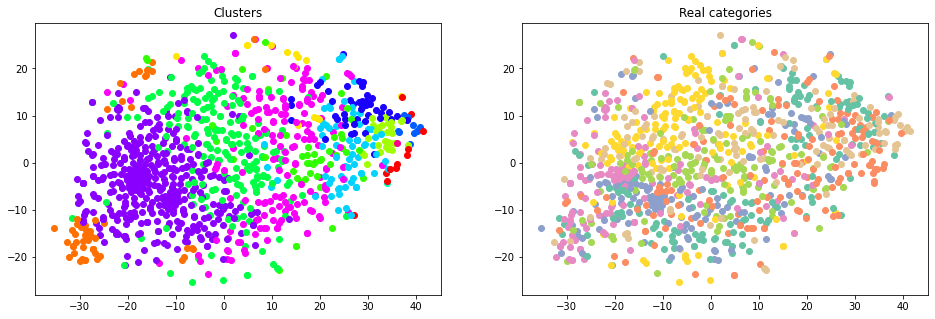

In [177]:
from sklearn.manifold import TSNE
#On regarde ce que ça donne avec les 7 clusters:
#Avec un Normalizer
tsne=TSNE(n_components=2)

X_trans=tsne.fit_transform(X_std)


plt.figure(figsize=(16,5))

kmean=KMeans(n_clusters=13)
kmean.fit(X_std)
y=kmean.predict(X_std)

plt.subplot(121)
for i in range(text_data.shape[0]):
    for j in range(13):
        cat=y[i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.hsv(cat/13))
plt.title('Clusters')
            
plt.subplot(122)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=df2['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat/7))
plt.title('Real categories')
            
plt.show()

In [ ]:
# Ca semble en effet bien mélangé

In [178]:
from sklearn.metrics import adjusted_rand_score
print(adjusted_rand_score(y,df2['cluster']))
print(accuracy_score(y,df2['cluster']))

0.048525729541494034
0.07809523809523809


In [328]:
results=np.array([0.049,0.079])


array([0.049, 0.079])

In [179]:
from sklearn.decomposition import PCA,KernelPCA

In [180]:
pca=PCA(n_components=102)
pca.fit(X_std)


PCA(n_components=102)

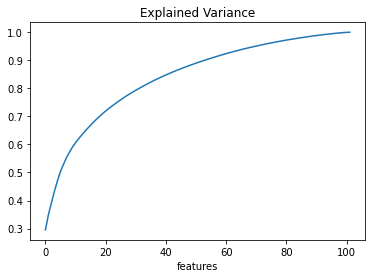

In [181]:
plt.plot(range(102),pca.explained_variance_ratio_.cumsum())
plt.title('Explained Variance')
plt.xlabel('features')
plt.show()

In [182]:
#On va tenter une réduction de dimension à 20 variables:
pca=PCA(n_components=20)

In [183]:
pca.fit(X_std)

PCA(n_components=20)

In [184]:
X_proj=pca.transform(X_std)

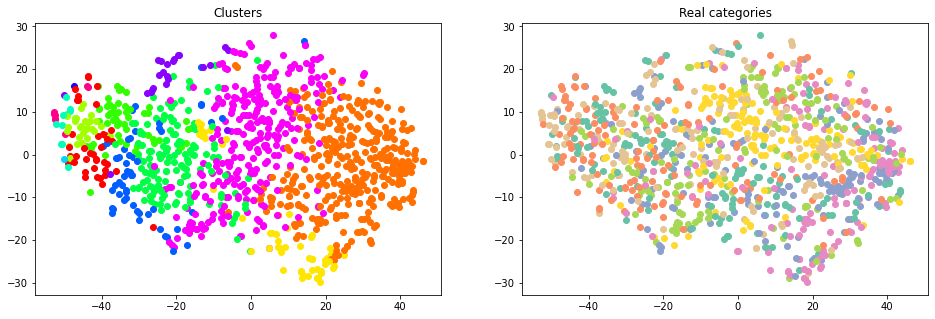

In [187]:
tsne=TSNE(n_components=2)
X_trans=tsne.fit_transform(X_proj)


plt.figure(figsize=(16,5))

kmean=KMeans(n_clusters=13)
kmean.fit(X_proj)
y=kmean.predict(X_proj)

plt.subplot(121)
for i in range(text_data.shape[0]):
    for j in range(13):
        cat=y[i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.hsv(cat/13))
plt.title('Clusters')
            
plt.subplot(122)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=df2['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat/7))
plt.title('Real categories')
            
plt.show()

In [188]:
print(adjusted_rand_score(y,df2['cluster']))
print(accuracy_score(y,df2['cluster']))

0.04848430573360736
0.06285714285714286


In [332]:
results=np.array([0.049,0.079])
results=np.vstack((results,np.array([0.049,0.063])))

In [85]:
#C'est un peu mieux

In [192]:
kpca=KernelPCA(kernel='rbf')
kpca.fit(X_std)


KernelPCA(kernel='rbf')

In [193]:
X_kproj=kpca.transform(X_std)

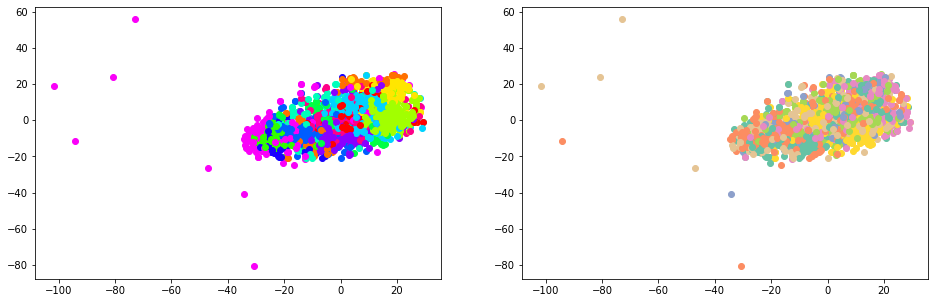

In [194]:
tsne=TSNE(n_components=2)
X_trans=tsne.fit_transform(X_kproj)


plt.figure(figsize=(16,5))

kmean=KMeans(n_clusters=13)
kmean.fit(X_kproj)
y=kmean.predict(X_kproj)

plt.subplot(121)
for i in range(text_data.shape[0]):
    for j in range(13):
        cat=y[i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.hsv(cat/13))
    
plt.subplot(122)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=df2['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat/7))
    
plt.show()

In [196]:
print(adjusted_rand_score(y,df2['cluster']))
print(accuracy_score(y,df2['cluster']))

0.05335041976125315
0.13238095238095238


In [336]:
results=np.vstack((results,np.array([0.053,0.132])))

# On essai SURF

In [197]:
sf =data.iloc[400]['image']
img=data.iloc[400]['image_trait']

In [201]:
import cv2
#Create SURF object. 
surf = cv2.SURF()
# Find keypoints and descriptors directly
kp, des = surf.detectAndCompute(img,None)



AttributeError: module 'cv2.cv2' has no attribute 'SURF'

# On essai ORB

In [17]:
data.head(1)

,uniq_id,image,categorie,image_trait
0,55b85ea15a1536d46b7190ad6fff8ce7,"[[198, 198, 198, 198, 198, 200, 200, 199, 199,...",Home Furnishing,"[[221, 221, 221, 221, 220, 220, 220, 220, 221,..."


## D'abord sur l'image brute reshappée en 224 224

In [18]:
sf =data.iloc[500]['image']
img=data.iloc[500]['image_trait']

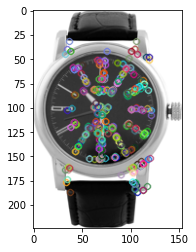

(<matplotlib.image.AxesImage at 0x7f7af675c4c0>, None)

In [19]:
# Initiate STAR detector
orb = cv2.ORB_create()

# compute the descriptors with ORB
kp, des = orb.detectAndCompute(sf,None)

# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(sf,kp,outImage=None)
plt.imshow(img2),plt.show()

In [21]:
#On va extraire les descripteurs des photos:
data['ORB']=data['image_trait'].apply(lambda x:orb.detectAndCompute(x,None)[1])

In [23]:
data['ORB'].apply(lambda x: size(x)).describe()

count     1050.000000
mean      7470.618095
std       4206.416195
min          1.000000
25%       3776.000000
50%       7984.000000
75%      11328.000000
max      14272.000000
Name: ORB, dtype: float64

In [25]:
#J'extrait tous mes descripteurs
descr=data.iloc[0]['ORB']
for i in range(1,1050):
    if size(data.iloc[i]['ORB'])>1:
        descr=np.vstack((descr,data.iloc[i]['ORB']))

In [26]:
size(descr)/32

245129.0

In [102]:
#On va faire un Kmean sur 10% de ces 250000 descripteurs:

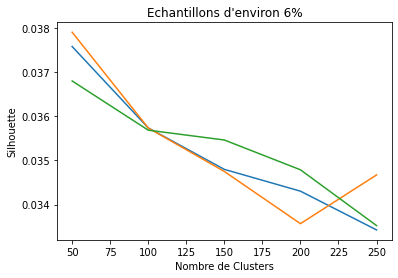

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#on va voir comment clusteriser ces descripteurs:
for i in range(3):
    #Je prends un échantillon d'environ 10% du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,15000)
    sil=[]
    for i in range(50,300,50):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(50,300,50),sil)
plt.title("Echantillons d'environ 6%")
plt.xlabel('Nombre de Clusters')
plt.ylabel('Silhouette')
plt.show()  
    

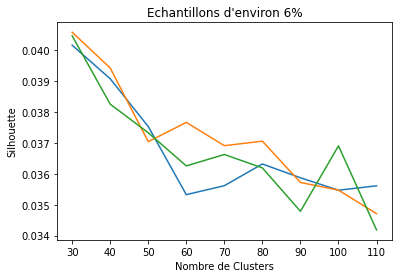

In [31]:
for i in range(3):
    #Je prends un échantillon du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,15000)
    sil=[]
    for i in range(30,120,10):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(30,120,10),sil)
plt.title("Echantillons d'environ 6%")
plt.xlabel('Nombre de Clusters')
plt.ylabel('Silhouette')
plt.show()  

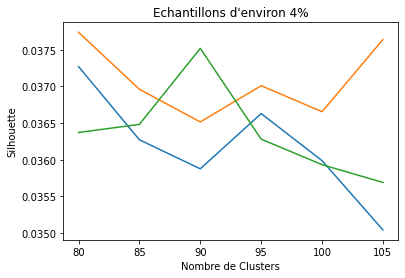

In [34]:
for i in range(3):
    #Je prends un échantillon du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,10000)
    sil=[]
    for i in range(80,110,5):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(80,110,5),sil)
plt.title("Echantillons d'environ 4%")
plt.xlabel('Nombre de Clusters')
plt.ylabel('Silhouette')
plt.show()  

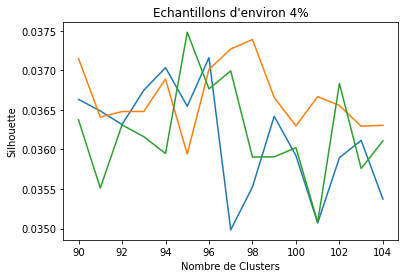

In [36]:
for i in range(3):
    #Je prends un échantillon du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,10000)
    sil=[]
    for i in range(90,105,1):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(90,105),sil)
plt.title("Echantillons d'environ 4%")
plt.xlabel('Nombre de Clusters')
plt.ylabel('Silhouette')
plt.show() 

In [37]:
#On va partir sur 102 clusters
#regardons ce que ça donne:
km=KMeans(n_clusters=102)
km.fit(descr)
y=km.predict(descr)

In [38]:
#On a donc notre cluster
#on va construire un df avec 64 features et pour chaque image on indiquera combien de descripteurs de chaque
#cluster elle contient:

df=data[['categorie',"ORB"]].copy()
df.head()


,categorie,ORB
0,Home Furnishing,"[[47, 190, 174, 31, 219, 255, 183, 254, 22, 25..."
1,Baby Care,"[[114, 197, 214, 247, 246, 11, 254, 255, 63, 1..."
2,Baby Care,"[[126, 92, 250, 229, 102, 30, 126, 112, 121, 2..."
3,Home Furnishing,"[[145, 135, 28, 59, 170, 217, 148, 47, 127, 95..."
4,Home Furnishing,"[[188, 171, 12, 163, 140, 143, 87, 169, 22, 11..."


In [39]:
for i in range(25):
    df[i]=np.zeros(df.shape[0])

 

In [40]:
km.predict(df.iloc[0]['ORB'])

array([ 73,  12,  39,  15,  73,  73,  21,   4,  70,  32,  21,   0,   0,
        32,  32,  30,  60,  43,  95,  39,  39,  55,   4,   0,  99,  99,
         3,   3,  21,   0,  95,  95,  21,   0,   0,   4,   0,   0,  52,
        97,  97,  96,  96,   4,   4,   4,  73,  21,  73,  43,  97,  78,
        43,  98,  42,   8,  30,  39,  73,   0,  77,   0,   0,  44,  22,
        32,  32,  30,   4,   2,   4,  32,  32,  22,   4,  21,   0,  39,
         0,  21,  49,  22,  32,  70,  73,  21,  46,  63,  74,  63,  96,
        62,  29,  21,   0,  44,  81,  21,  73,   0,   4,  43,   4,  46,
        81,  95,  32,  32,   4,  95,  18,  59,  95,  84, 100,   0,   4,
        97,  21,  64,  70,  64,  55,  81,   0,   0,   0,  44,  44,  39,
        65,   0,  22,  65,  45,  21,  59,  46,  32,  18,  95,  59,  95,
        18,  40,  80,  14,  80,   2,  97,  95,  21,  32,  31,  32,  18,
        95,   0,   4,   4,  91,  28,   4,  81,   4,   0,  39,   8,  62,
        26,  26,  27,  27,  70,  44,  96,  32,  97,  46,  95,  9

In [41]:
def features(row,k):
    n=0
    if size(row['ORB'])==1:
        return 0
    for i in km.predict(row['ORB']):
        if i==k:
            n+=1
    return n

In [44]:
for i in range(102):
    df[i]=df.apply(lambda x: features(x,i),axis=1)

In [298]:
df

,categorie,ORB,0,1,2,3,4,5,6,7,...,93,94,95,96,97,98,99,100,101,cluster
0,Home Furnishing,"[[47, 190, 174, 31, 219, 255, 183, 254, 22, 25...",22,0,2,3,17,4,2,0,...,2,0,23,7,14,1,3,1,9,1
1,Baby Care,"[[114, 197, 214, 247, 246, 11, 254, 255, 63, 1...",0,0,0,3,5,2,4,1,...,3,0,5,5,2,0,1,1,3,6
2,Baby Care,"[[126, 92, 250, 229, 102, 30, 126, 112, 121, 2...",6,2,1,4,10,6,3,5,...,6,16,1,1,1,5,0,4,3,6
3,Home Furnishing,"[[145, 135, 28, 59, 170, 217, 148, 47, 127, 95...",3,2,5,1,8,0,0,3,...,2,1,8,3,3,1,4,4,4,1
4,Home Furnishing,"[[188, 171, 12, 163, 140, 143, 87, 169, 22, 11...",4,5,3,4,6,3,2,5,...,1,3,10,1,7,5,3,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,Baby Care,"[[158, 158, 238, 182, 230, 178, 191, 247, 185,...",2,2,5,4,11,3,1,7,...,3,9,2,1,10,9,2,1,1,6
1046,Baby Care,"[[24, 143, 158, 189, 184, 154, 98, 39, 188, 14...",14,0,0,10,4,2,0,0,...,3,3,4,2,3,5,2,1,1,6
1047,Baby Care,"[[37, 106, 107, 5, 70, 75, 235, 232, 86, 118, ...",0,9,9,7,3,6,5,4,...,5,4,4,1,6,2,5,4,5,6
1048,Baby Care,"[[54, 205, 106, 158, 87, 135, 190, 228, 222, 1...",0,3,1,1,3,0,0,3,...,0,9,0,0,3,1,2,1,0,6


In [299]:
X=df.drop(['categorie','ORB'],axis=1).values

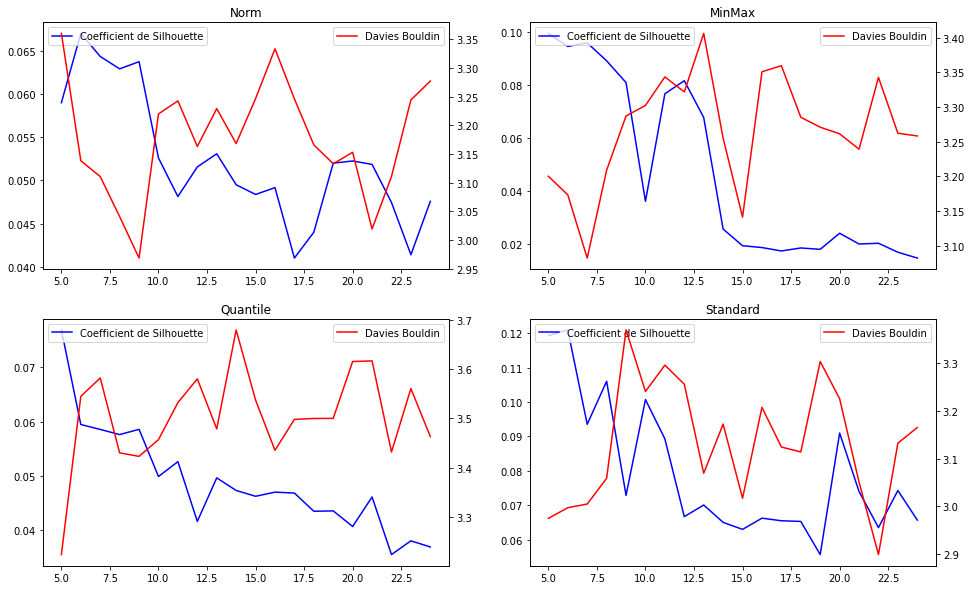

In [203]:
#On standardise et on regarde ce que ça donne:

from sklearn.preprocessing import Normalizer,MinMaxScaler,QuantileTransformer,StandardScaler
from sklearn.metrics import davies_bouldin_score

Trans=[Normalizer(),MinMaxScaler(),QuantileTransformer(),StandardScaler()]
Name=['Norm','MinMax','Quantile','Standard']
fig=figure(figsize=(16,10))
for i in range (4):
    sil=[]
    DB=[]
    X_trans=Trans[i].fit_transform(X)
    for n in range (5,25):
        kmean=KMeans(n_clusters=n)
        kmean.fit(X_trans)
        y=kmean.predict(X_trans)
        sil.append(silhouette_score(X_trans,y))
        DB.append(davies_bouldin_score(X_trans,y))
    plt.subplot(2,2,i+1)
    sil=plt.plot(range(5,25),sil,c='b')
    plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
    ax2 = pyplot.gca().twinx()
    db=plt.plot(range(5,25),DB,c='r')
    plt.legend(db,['Davies Bouldin'],loc='upper right')
    plt.title(Name[i])
plt.show()

In [313]:
def cat(x):
    if x=='Home Furnishing':
        return 1
    if x=='Kitchen & Dining':
        return 2
    if x=='Computers':
        return 3
    if x=='Beauty and Personal Care':
        return 4
    if x=='Watches':
        return 5
    if x=='Baby Care':
        return 6
    else:
        return 0

In [314]:
df['cluster']=df['categorie'].apply(lambda x : cat(x))
X_std=MinMaxScaler().fit_transform(X)

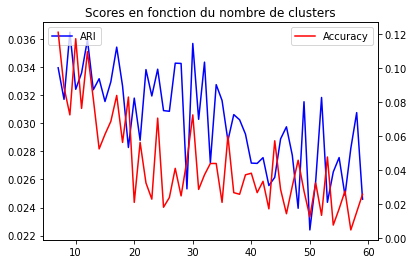

In [206]:
#On regarde ce que donnent les scores en fonction du nombre de cluster:


ARI=[]
acc=[]

for n_cluster in range(7,60):
    kmean=KMeans(n_clusters=n_cluster)
    kmean.fit(X_std)
    y=kmean.predict(X_std)
    ARI.append(adjusted_rand_score(y,df['cluster']))
    acc.append(accuracy_score(y,df['cluster']))

rand=plt.plot(range(7,60),ARI,label="ARI",c='b')
plt.legend(rand,['ARI'],loc='upper left')
ax2 = pyplot.gca().twinx()
accuracy=plt.plot(range(7,60),acc,c='r')
plt.legend(accuracy,['Accuracy'],loc='upper right')
plt.title('Scores en fonction du nombre de clusters')
plt.show()


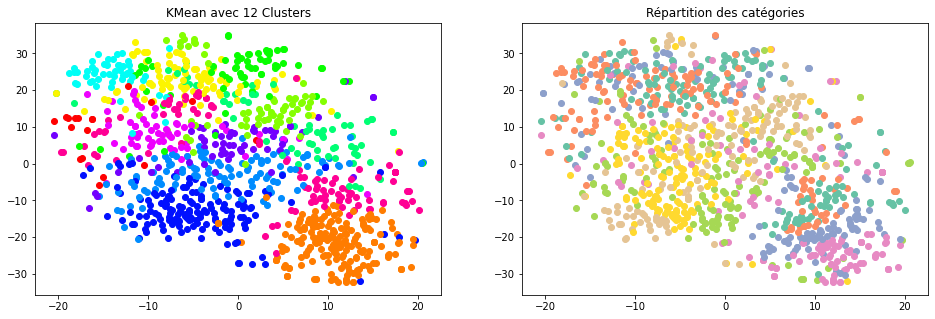

In [315]:
from sklearn.manifold import TSNE
#On regarde ce que ça donne avec 12 clusters:
#Avec un Standard Scaler
tsne=TSNE(n_components=2)
X_trans=tsne.fit_transform(X_std)


plt.figure(figsize=(16,5))

kmean=KMeans(n_clusters=12)
kmean.fit(X_std)
y=kmean.predict(X_std)

plt.subplot(121)
for i in range(text_data.shape[0]):
    for j in range(12):
        cat=y[i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.hsv(cat/12))
plt.title('KMean avec 12 Clusters')
            
plt.subplot(122)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=df['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat/7))
plt.title('Répartition des catégories')
            
plt.show()

In [209]:
print(adjusted_rand_score(y,df['cluster']))
print(accuracy_score(y,df['cluster']))

0.1118532375568114
0.03428571428571429


In [337]:
results=np.vstack((results,np.array([0.112,0.034])))

In [ ]:
#C'est pas fameux mais toujours mieux qu'avec SIFT

In [316]:
from sklearn.decomposition import PCA,KernelPCA

In [317]:
pca=PCA(n_components=102)
pca.fit(X_std)


PCA(n_components=102)

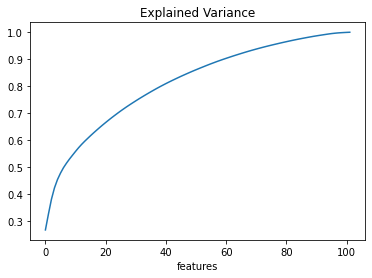

In [318]:
plt.plot(range(102),pca.explained_variance_ratio_.cumsum())
plt.title('Explained Variance')
plt.xlabel('features')
plt.show()

In [320]:
#On va tenter une réduction de dimension à 20 variables:
pca=PCA(n_components=15)

In [321]:
pca.fit(X_std)

PCA(n_components=15)

In [322]:
X_proj=pca.transform(X_std)

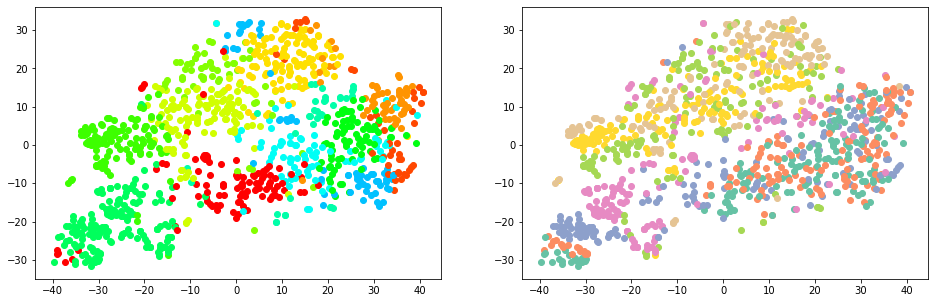

In [323]:
tsne=TSNE(n_components=2)
X_trans=tsne.fit_transform(X_proj)


plt.figure(figsize=(16,5))

kmean=KMeans(n_clusters=12)
kmean.fit(X_proj)
y=kmean.predict(X_proj)

plt.subplot(121)
for i in range(text_data.shape[0]):
    for j in range(20):
        cat=y[i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.hsv(cat/20))
    
plt.subplot(122)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=df['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat/7))
    
plt.show()

In [217]:
print(adjusted_rand_score(y,df['cluster']))
print(accuracy_score(y,df['cluster']))

0.11332456375684904
0.19238095238095237


In [338]:
results=np.vstack((results,np.array([0.113,0.192])))

In [ ]:
#Un peu mieux mais pas top... néanmoins les catégorie se séparent plus facilement

In [218]:
kpca=KernelPCA(kernel='rbf')
kpca.fit(X_std)


KernelPCA(kernel='rbf')

In [219]:
X_kproj=kpca.transform(X_std)

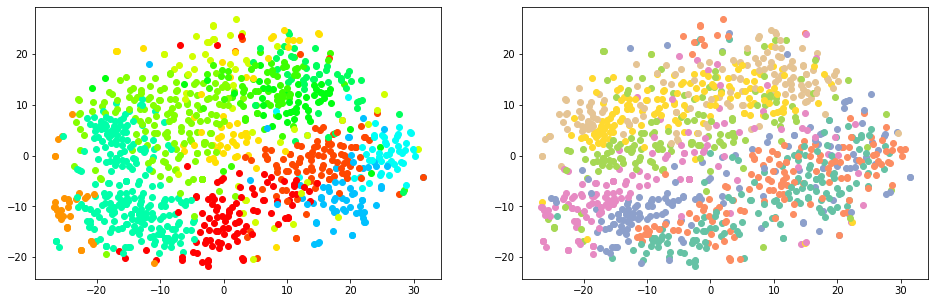

In [220]:
tsne=TSNE(n_components=2)
X_trans=tsne.fit_transform(X_kproj)


plt.figure(figsize=(16,5))

kmean=KMeans(n_clusters=12)
kmean.fit(X_kproj)
y=kmean.predict(X_kproj)

plt.subplot(121)
for i in range(text_data.shape[0]):
    for j in range(12):
        cat=y[i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.hsv(cat/12))
    
plt.subplot(122)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=df['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat/7))
    
plt.show()

In [221]:
print(adjusted_rand_score(y,df['cluster']))
print(accuracy_score(y,df['cluster']))

0.1044266218175556
0.17238095238095238


In [339]:
results=np.vstack((results,np.array([0.104,0.172])))

In [ ]:
#On a encore un peu amélioré mais c'est toujours pas génial...

In [342]:
resultssift=results[:3,:]
resultsorb=results[4:,:]

In [359]:
resultssift

array([[0.049, 0.079],
       [0.049, 0.063],
       [0.053, 0.132]])

In [345]:
resultsorb

array([[0.112, 0.034],
       [0.113, 0.192],
       [0.104, 0.172]])

In [360]:
vstack((resultssift[:,0],resultsorb[:,0],resultssift[:,1],resultsorb[:,1])).T

array([[0.049, 0.112, 0.079, 0.034],
       [0.049, 0.113, 0.063, 0.192],
       [0.053, 0.104, 0.132, 0.172]])

In [351]:
index=pd.Index(['Sans réduction de dimension','Après PCA', 'Avec une Kernel PCA rbf'])
columns=pd.MultiIndex.from_product([['Adjusted Rand Score','Accuracy Score'],['SIFT','ORB']],names=['Scores','Méthode'])

In [362]:
pd.DataFrame(vstack((resultssift[:,0],resultsorb[:,0],resultssift[:,1],resultsorb[:,1])).T,index=index,columns=columns)

Scores                      Adjusted Rand Score        Accuracy Score       
Méthode                                    SIFT    ORB           SIFT    ORB
Sans réduction de dimension               0.049  0.112          0.079  0.034
Après PCA                                 0.049  0.113          0.063  0.192
Avec une Kernel PCA rbf                   0.053  0.104          0.132  0.172

# On va essayer le transfer Learning

In [1]:
from keras.applications.vgg16 import VGG16
# load model
model = VGG16()
# summarize the model
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
text_data=pd.read_csv('/home/samuel/Documents/Data/OC/Projet6/Dataset+projet+prétraitement+textes+images/Flipkart/flipkart_com-ecommerce_sample_1050.csv')

In [5]:
text_data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [6]:
def find(x):
    c=re.findall(r'\["([A-Za-z &]*) >> ',x)
    return c[0]
find('["Home Furnishing >> Curtains & Accessories >>')

'Home Furnishing'

In [7]:
data=text_data[['uniq_id','image','product_category_tree']].copy()
data['categorie']=data['product_category_tree'].apply(lambda x:find(x))
data.drop('product_category_tree',axis=1,inplace=True)

In [8]:
data.describe()

,uniq_id,image,categorie
count,1050,1050,1050
unique,1050,1050,7
top,07f8bdc4372a73d0820507683a936b6e,4f708bc74c4d29b2967dc38a1f5ae6d5.jpg,Computers
freq,1,1,150


In [9]:
#On charge les images au format VGG16
data['imagevgg16']=data['image'].apply(lambda x: img_to_array(load_img(x,target_size=(224,224))))
# reshape data for the model
data['image_resh']=data['imagevgg16'].apply(lambda x: x.reshape((1, x.shape[0], x.shape[1], x.shape[2])))
# prepare the image for the VGG model
data['image']=data['image_resh'].apply(lambda x: preprocess_input(x))
#On fait les prédictions
data['predict']=data['image'].apply(lambda x:model.predict(x))

/home/samuel/anaconda3/lib/python3.8/site-packages/PIL/Image.py:2834: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [11]:
from keras.applications.vgg16 import decode_predictions
#On récupère le label
data['label']=data['predict'].apply(lambda x: decode_predictions(x,top=1)[0][0][1])
data['label2']=data['predict'].apply(lambda x: decode_predictions(x,top=2)[0][1][1])
data['label1%']=data['predict'].apply(lambda x: decode_predictions(x,top=2)[0][0][2])
data['label2%']=data['predict'].apply(lambda x: decode_predictions(x,top=2)[0][1][2])


#On conserve la catégorie et le label
vgg=data[['categorie','label','label2','label1%','label2%']].copy()

In [12]:
vgg

,categorie,label,label2,label1%,label2%
0,Home Furnishing,four-poster,shower_curtain,0.367659,0.194400
1,Baby Care,bath_towel,wool,0.999836,0.000120
2,Baby Care,bath_towel,wool,0.596971,0.236376
3,Home Furnishing,studio_couch,velvet,0.957405,0.015089
4,Home Furnishing,quilt,four-poster,0.808342,0.064541
...,...,...,...,...,...
1045,Baby Care,shower_curtain,four-poster,0.450879,0.109414
1046,Baby Care,balloon,candle,0.078223,0.049349
1047,Baby Care,crib,plate_rack,0.754595,0.162616
1048,Baby Care,harmonica,hoopskirt,0.138169,0.092161


In [13]:
categ=data['categorie'].unique().tolist()

In [14]:
categ

['Home Furnishing',
 'Baby Care',
 'Watches',
 'Home Decor & Festive Needs',
 'Kitchen & Dining',
 'Beauty and Personal Care',
 'Computers']

In [15]:
dico={}
unique=0
multiple=0
for i in vgg['label'].unique():
    dico[i]=vgg[vgg['label']==i]['categorie'].unique().tolist()


In [17]:
dico

{'four-poster': ['Home Furnishing', 'Beauty and Personal Care'],
 'bath_towel': ['Baby Care', 'Beauty and Personal Care', 'Home Furnishing'],
 'studio_couch': ['Home Furnishing',
  'Home Decor & Festive Needs',
  'Baby Care'],
 'quilt': ['Home Furnishing', 'Baby Care'],
 'stopwatch': ['Watches', 'Beauty and Personal Care'],
 'analog_clock': ['Watches', 'Home Decor & Festive Needs'],
 'digital_watch': ['Watches'],
 'magnetic_compass': ['Watches',
  'Kitchen & Dining',
  'Home Decor & Festive Needs'],
 'radio': ['Watches', 'Computers'],
 'wool': ['Home Furnishing', 'Baby Care'],
 'mortar': ['Home Decor & Festive Needs'],
 'coffeepot': ['Kitchen & Dining', 'Home Decor & Festive Needs'],
 'spotlight': ['Kitchen & Dining'],
 'pillow': ['Home Furnishing'],
 'swimming_trunks': ['Baby Care'],
 'velvet': ['Home Furnishing', 'Baby Care'],
 'jersey': ['Baby Care'],
 'sunscreen': ['Beauty and Personal Care'],
 'coffee_mug': ['Kitchen & Dining', 'Baby Care'],
 'switch': ['Computers'],
 'ocarina': [

In [381]:
data[data['label1%']>2*data['label2%']]['label1%'].describe()

count    661.000000
mean       0.670504
std        0.224639
min        0.102239
25%        0.484315
50%        0.690800
75%        0.868255
max        0.999836
Name: label1%, dtype: float64

In [19]:
def cat(x):
    if x=='Home Furnishing':
        return 1
    if x=='Kitchen & Dining':
        return 2
    if x=='Computers':
        return 3
    if x=='Beauty and Personal Care':
        return 4
    if x=='Watches':
        return 5
    if x=='Baby Care':
        return 6
    else:
        return 0
data['cluster']=data['categorie'].apply(lambda x: cat(x))

In [46]:
data['predict'][0]

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [49]:
pred=data['predict'].apply(lambda x:x[0])

In [50]:
df=pd.DataFrame


0       [2.1509983e-09, 4.8031046e-07, 9.2128225e-09, ...
1       [4.978937e-16, 5.118132e-15, 1.0723927e-16, 3....
2       [2.1111235e-07, 1.7210732e-07, 1.825032e-08, 9...
3       [7.817685e-09, 1.0448536e-08, 6.537467e-09, 2....
4       [2.740301e-10, 4.025348e-08, 7.0368333e-10, 3....
                              ...                        
1045    [1.2465607e-08, 5.457547e-06, 4.962376e-08, 4....
1046    [1.6079288e-07, 2.322778e-05, 5.03235e-06, 2.0...
1047    [9.277103e-09, 4.0813903e-09, 4.304228e-08, 3....
1048    [2.6203338e-06, 4.508078e-06, 1.1077476e-05, 2...
1049    [7.155954e-07, 1.5220033e-05, 7.254523e-07, 7....
Name: predict, Length: 1050, dtype: object

In [60]:
X=np.stack(pred.values,axis=0)
X

array([[2.1509983e-09, 4.8031046e-07, 9.2128225e-09, ..., 9.2590833e-09,
        6.4337775e-07, 4.0326090e-06],
       [4.9789370e-16, 5.1181322e-15, 1.0723927e-16, ..., 4.5428047e-14,
        3.4062182e-12, 2.0769717e-08],
       [2.1111235e-07, 1.7210732e-07, 1.8250320e-08, ..., 3.2104502e-08,
        4.1837002e-06, 4.8371157e-06],
       ...,
       [9.2771026e-09, 4.0813903e-09, 4.3042281e-08, ..., 2.0015209e-09,
        1.9135659e-07, 7.1330651e-06],
       [2.6203338e-06, 4.5080778e-06, 1.1077476e-05, ..., 9.7046609e-07,
        1.9234692e-05, 1.5170804e-03],
       [7.1559538e-07, 1.5220033e-05, 7.2545231e-07, ..., 7.5338119e-07,
        1.4695441e-05, 9.7892329e-04]], dtype=float32)

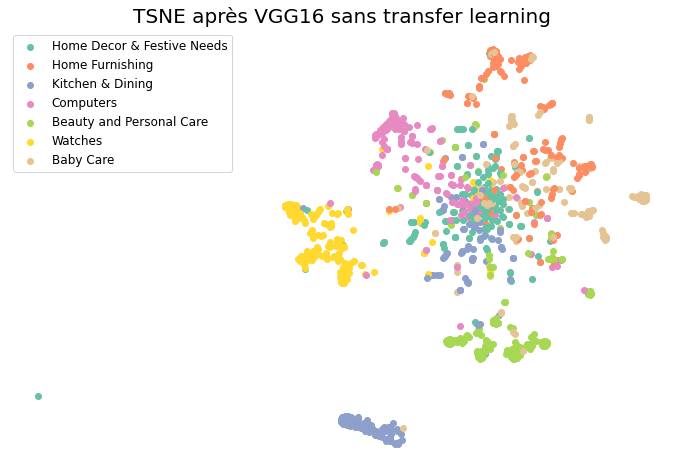

In [67]:
#On visualise avec TSNE les images en sortie de VGG16
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)
X_trans=tsne.fit_transform(X)

labels=['Home Decor & Festive Needs','Home Furnishing','Kitchen & Dining','Computers','Beauty and Personal Care','Watches','Baby Care']
fig=plt.figure(figsize=(12,8))
for i in range(1050):
    cat=data['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((h,hf,k,c,b,w,bab),labels,prop={'size':12},loc='upper left')
plt.title('TSNE après VGG16 sans transfer learning',size=20)
plt.axis('off')
plt.show()



# On va tenter de réentrainer la dernière couche pour la classification:

In [68]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense
from keras.models import Model
from keras.layers import Flatten
# Charger VGG-16 pré-entraîné sans les couches fully-connected
model = VGG16(include_top=False, input_shape=(224, 224, 3))

for layer in model.layers:
    layer.trainable = False

# Ajouter la nouvelle couche fully-connected pour la classification à 10 classes
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
predictions = Dense(7, activation='softmax')(flat1)

model = Model(inputs=model.input, outputs=predictions)

In [69]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [22]:
data.head(1)

,uniq_id,image,categorie,imagevgg16,image_resh,predict,label,label2,label1%,label2%,cluster
0,55b85ea15a1536d46b7190ad6fff8ce7,"[[[[88.061 87.221 82.32 ], [87.061 86.221 81.3...",Home Furnishing,"[[[82.32, 87.221, 88.061], [81.32, 86.221, 87....","[[[[82.32 87.221 88.061], [81.32 86.221 87.0...","[[2.1509983e-09, 4.8031046e-07, 9.2128225e-09,...",four-poster,shower_curtain,0.367659,0.1944,1


In [70]:
X=np.stack(data['imagevgg16'].values, axis=0 )
def convert(x):
    res=np.zeros(7)
    res[x]=1
    return res
y=data['cluster'].apply(lambda x:convert(x))
y=np.stack(y.values, axis=0)
print(X.shape,y.shape)

(1050, 224, 224, 3) (1050, 7)


In [71]:
#On va entrainer le modele sur la moitié du jeu de donnée
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=data['cluster'],test_size=0.5)



In [72]:
X_train.shape

(525, 224, 224, 3)

In [73]:
y_train.shape

(525, 7)

In [75]:
# Compiler le modèle 
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])
# Entraîner sur les données d'entraînement (X_train, y_train) (Les résultats montrent le deuxième entrainement)
model_info = model.fit(X_train, y_train)


17/17 [==============================] - 150s 9s/step - loss: 5.4043 - accuracy: 0.8840


In [76]:
# Entraîner sur les données d'entraînement (X_train, y_train)
model_info = model.fit(X_train, y_train)


17/17 [==============================] - 144s 8s/step - loss: 0.3017 - accuracy: 0.9810


In [77]:
y_pred=model.predict(X_test)

In [78]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 2.0800969e-30,
        0.0000000e+00, 0.0000000e+00],
       [1.3573707e-22, 2.8841077e-37, 2.7649686e-36, ..., 5.2016177e-03,
        5.8638012e-31, 2.5539010e-22],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.5768837e-18, 0.0000000e+00, 2.1433204e-22, ..., 4.1471922e-16,
        1.5735559e-24, 7.1916561e-34],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [79]:
#On visualise avec TSNE les nouveaux résultats sur les 1050 images:
X_pred=model.predict(X)


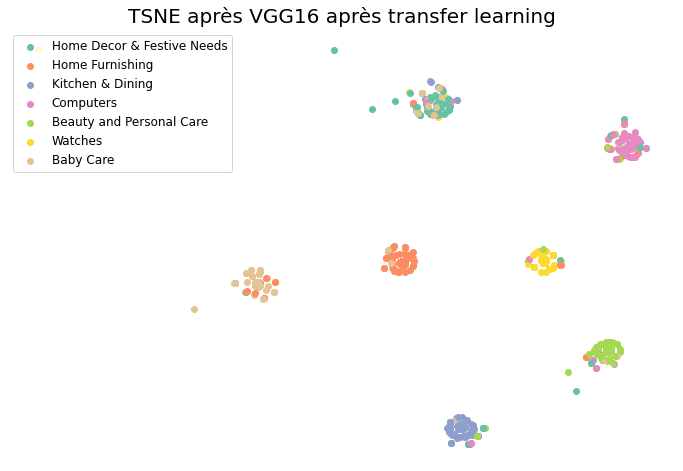

In [81]:
tsne=TSNE(n_components=2)
X_trans=tsne.fit_transform(X_pred)

labels=['Home Decor & Festive Needs','Home Furnishing','Kitchen & Dining','Computers','Beauty and Personal Care','Watches','Baby Care']
fig=plt.figure(figsize=(12,8))
for i in range(1050):
    cat=data['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((h,hf,k,c,b,w,bab),labels,prop={'size':12},loc='upper left')
plt.title('TSNE après VGG16 après transfer learning',size=20)
plt.axis('off')
plt.show()


In [75]:
test=pd.DataFrame(y_test)

In [76]:
test['max']=test.idxmax(axis="columns")

In [77]:
true=test['max']

In [78]:
pred=pd.DataFrame(y_pred)
pred['max']=pred.idxmax(axis="columns")
predicted=pred['max']

In [85]:
predicted

0      6
1      2
2      6
3      0
4      2
      ..
520    3
521    2
522    5
523    5
524    5
Name: max, Length: 525, dtype: int64

In [84]:
true

0      1
1      6
2      6
3      0
4      2
      ..
520    3
521    2
522    5
523    5
524    5
Name: max, Length: 525, dtype: int64

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(true,predicted)

0.7866666666666666

In [95]:
res=pd.DataFrame()
res['predicted']=predicted
res['True']=true
labels=['Home Decor & Festive Needs','Home Furnishing','Kitchen & Dining','Computers','Beauty and Personal Care','Watches','Baby Care']
colors=['#0002E1','#FFFF00','#000000','#FFAF00','#FF270A','#00D104','#AC04D1']

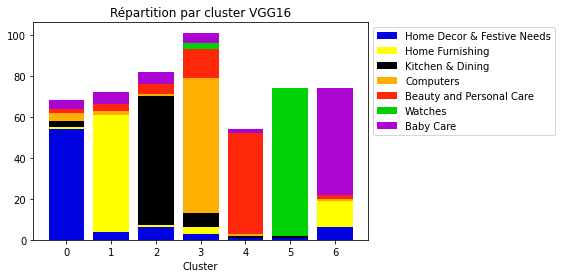

In [97]:
#visualisons les résultats:
#On regarde les résultats:
    
df=pd.DataFrame(res.groupby(by=['predicted','True'])[['True']].aggregate('count').unstack().values).fillna(0)
df.columns=labels
    
    
r=range(7)
    
a=np.zeros(7)
for j in range(7):
    a+=df[labels[j]]
    plt.bar(r, df[labels[j]],bottom=a-df[labels[j]], color=colors[j],label=labels[j])
plt.title("Répartition par cluster VGG16")
plt.xlabel("Cluster")
plt.ylim=(0,350)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

# On essai de combiner le Kmean et VGG sur tout le DataFrame

In [103]:
pred_km={0:3,2:4,3:0,4:5,5:1,6:3,7:6,8:5,10:1,11:2,12:4}
KM=pd.read_csv('KM.csv',index_col=0)

In [109]:
final=data[['image']]

In [104]:
KM.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,prediction
0,1.125293,0.993948,1.188425,1.080067,1.193049,1.080086,1.080856,1.111795,1.153574,1.148818,0.448148,1.230891,1.175698,10
1,1.129212,0.998528,1.185205,1.101627,1.180983,1.080662,1.087219,0.983815,1.128133,0.550295,1.288502,1.242881,1.176620,9
2,1.132176,1.004434,1.192645,1.094598,1.194964,1.103821,1.090154,1.070169,1.150447,0.853995,1.298846,1.242750,1.178235,9
3,1.130849,0.988049,1.194250,1.054880,1.200142,1.088847,1.086151,1.089231,1.157202,0.959551,1.281694,1.244321,1.181428,9
4,1.128228,0.985292,1.191492,1.055699,1.197401,1.032267,1.081921,1.088560,1.156896,0.970724,1.273608,1.242264,1.180297,9


In [110]:
final['km']=KM['prediction'].copy()

<ipython-input-110-57024cc41f6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['km']=KM['prediction'].copy()


In [111]:
final.head()

,image,km
0,"[[[[88.061 87.221 82.32 ], [87.061 86.221 81.3...",10
1,"[[[[151.061 138.22101 131.32 ], [151.061 ...",9
2,"[[[[151.061 138.22101 131.32 ], [151.061 ...",9
3,"[[[[151.061 138.22101 131.32 ], [151.061 ...",9
4,"[[[[ -95.939 -99.779 -103.68 ], [15.060997 ...",9


In [117]:
model.predict(final['image'][121]).argmax()

6

In [125]:
def prediction(row):
    if row['km']==1:
        return model.predict(row['image']).argmax()
    elif row['km']==5 or row['km']==9:
        a=model.predict(row['image']).argmax()
        if a in [1,6]:
            return a
        else: 
            return 1
    else:
        return pred_km[row['km']]

In [126]:
final['prediction']=final.apply(lambda row:prediction(row),axis=1)

<ipython-input-126-7dbd68d61f95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['prediction']=final.apply(lambda row:prediction(row),axis=1)


In [129]:
from sklearn.metrics import adjusted_rand_score
print(accuracy_score(data['cluster'],final['prediction']))
print(adjusted_rand_score(data['cluster'],final['prediction']))

0.92
0.8237846300267013


In [130]:
#On regarde tout ça:
resfin=pd.DataFrame()
resfin['predicted']=final['prediction']
resfin['True']=data['cluster']

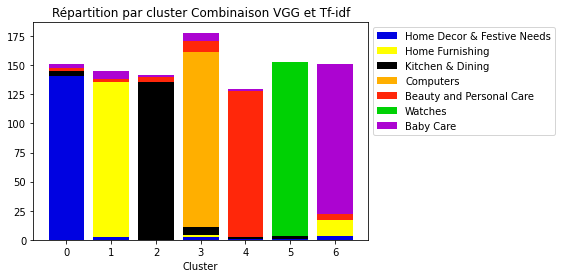

In [133]:
df=pd.DataFrame(resfin.groupby(by=['predicted','True'])[['True']].aggregate('count').unstack().values).fillna(0)
df.columns=labels
    
    
r=range(7)
    
a=np.zeros(7)
for j in range(7):
    a+=df[labels[j]]
    plt.bar(r, df[labels[j]],bottom=a-df[labels[j]], color=colors[j],label=labels[j])
plt.title("Répartition par cluster Combinaison VGG et Tf-idf")
plt.xlabel("Cluster")
plt.ylim=(0,350)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()